In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('df1.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,Jan,0
7213443,2018-12-31,American Airlines,Charlotte,Memphis,4,-5.0,36.0,4,4,4.0,4,11.0,0.0,112.0,128.0,88.0,511.0,31,12,Dec,1
7213444,2018-12-31,American Airlines,Charlotte,Raleigh,3,23.0,11.0,3,3,4.0,3,14.0,0.0,50.0,41.0,26.0,130.0,31,12,Dec,1
7213445,2018-12-31,American Airlines,Raleigh,Charlotte,3,8.0,8.0,3,3,7.0,3,-4.0,0.0,71.0,59.0,44.0,130.0,31,12,Dec,0


In [3]:
df1.shape

(7076405, 21)

In [4]:
df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

In [5]:
df1.columns

Index(['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DELAY', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DAY', 'MONTH', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [6]:
df1 = df1[['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
           'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
           'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 
           'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS']]
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0


# Visualizations - Single Plots
# Total Number of Flights per Airline
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [7]:
df1.OP_CARRIER.value_counts()

Southwest Airlines    1331609
Delta Airlines         943837
American Airlines      899527
SkyWest Airlines       760796
United Airlines        614915
Republic Airways       305251
JetBlue Airways        297758
Envoy Air              284497
PSA Airlines           265784
Alaska Airlines        242979
Endeavor Air           236403
Mesa Airline           209094
ExpressJet             196583
Spirit Airlines        174129
Frontier Airlines      117523
Allegiant Air           95192
Hawaiian Airlines       83375
Virgin America          17153
Name: OP_CARRIER, dtype: int64

# Number of Delayed Flights by Airline
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [8]:
# Percentage of delayed flights per airline
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.624772
1    0.375228
Name: FLIGHT_STATUS, dtype: float64

In [9]:
# 1. Creating the new dataframe with the columns of my interest
df1_PFD = df1[['OP_CARRIER', 'FLIGHT_STATUS']]
df1_PFD.head()

,OP_CARRIER,FLIGHT_STATUS
0,United Airlines,0
1,United Airlines,0
2,United Airlines,0
3,United Airlines,0
4,United Airlines,1


In [10]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df1_PFD.shape

(7076405, 2)

In [11]:
# 3. Non-normalize value_count()
df1_PFD.FLIGHT_STATUS.value_counts()

0    4421139
1    2655266
Name: FLIGHT_STATUS, dtype: int64

In [12]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df1_PFD.groupby(['OP_CARRIER']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,89483,242979,36.83
1,Allegiant Air,39754,95192,41.76
2,American Airlines,355079,899527,39.47
3,Delta Airlines,278386,943837,29.50
4,Endeavor Air,74553,236403,31.54
5,Envoy Air,111435,284497,39.17
6,ExpressJet,71497,196583,36.37
7,Frontier Airlines,54203,117523,46.12
8,Hawaiian Airlines,30381,83375,36.44
9,JetBlue Airways,131673,297758,44.22


In [13]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 2655266


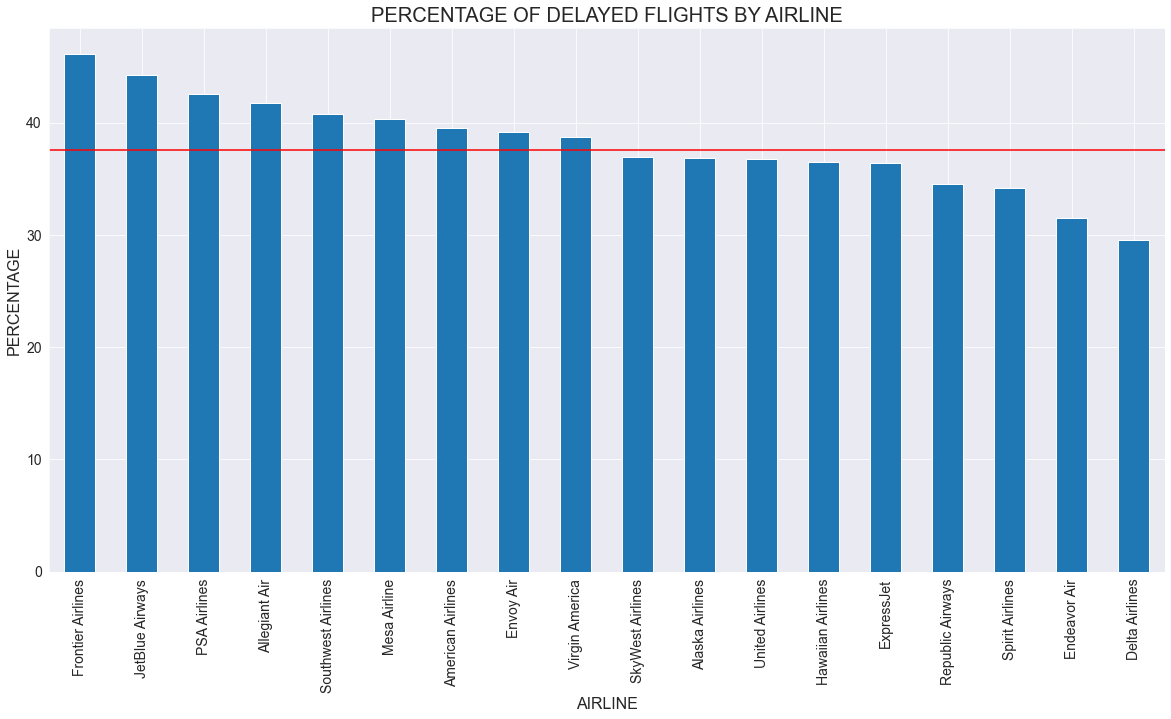

In [14]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

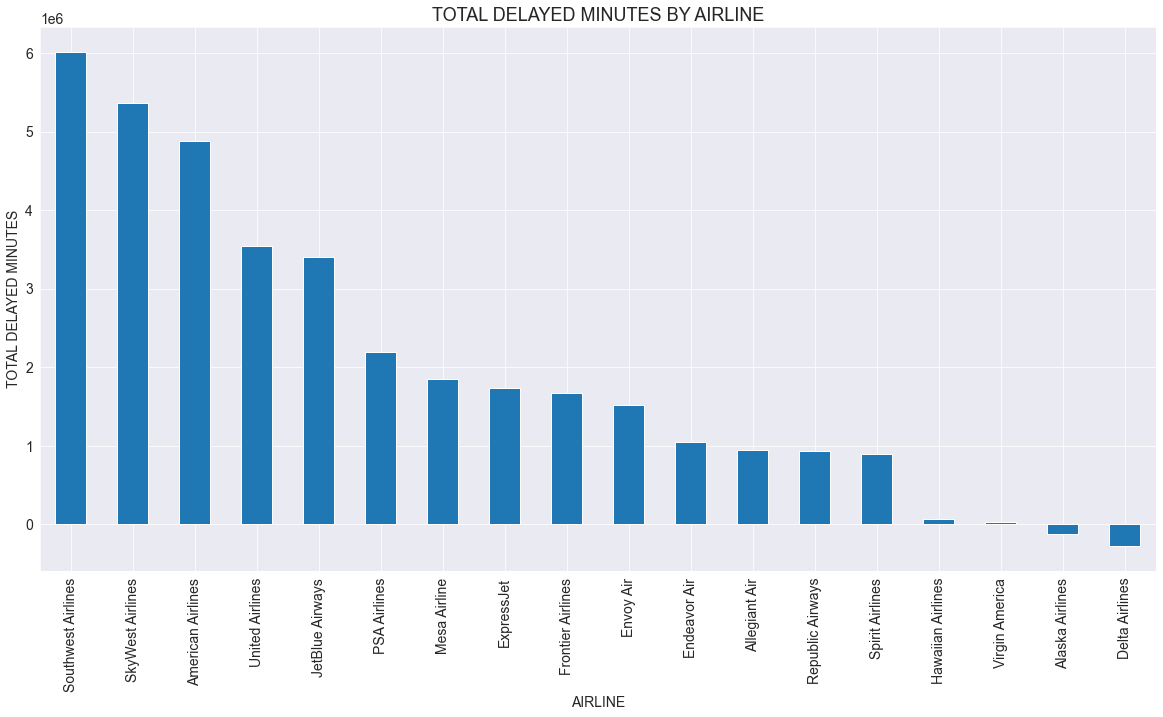

In [15]:
# Total Minutes Delayed by Airline

plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [50]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,OP_CARRIER,AVG_DELAY
0,Alaska Airlines,-0.501562
1,Delta Airlines,-0.289825
2,Hawaiian Airlines,0.851310
3,Virgin America,1.727978
4,Republic Airways,3.076668
5,Endeavor Air,4.452778
6,Southwest Airlines,4.519644
7,Spirit Airlines,5.171453
8,Envoy Air,5.357280
9,American Airlines,5.432065


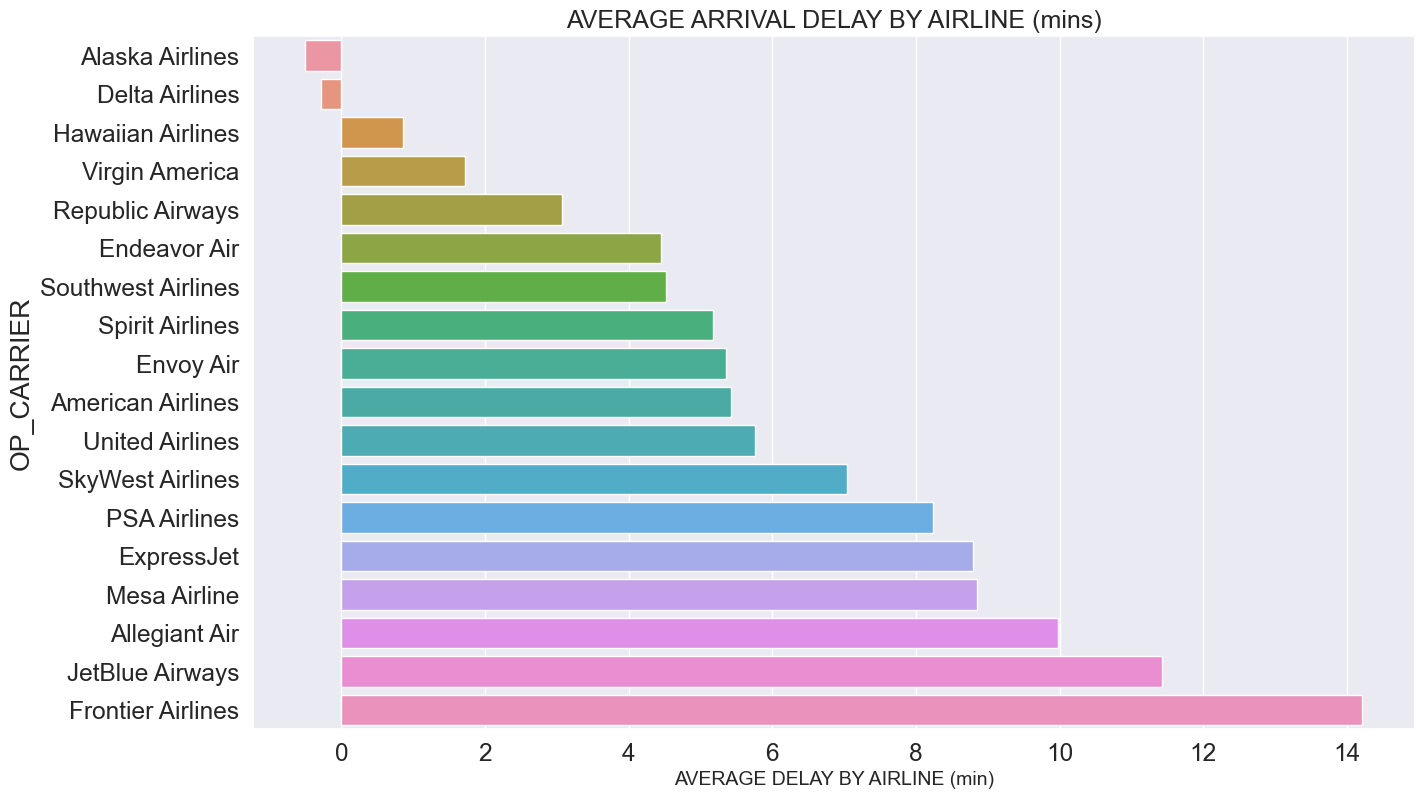

In [51]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

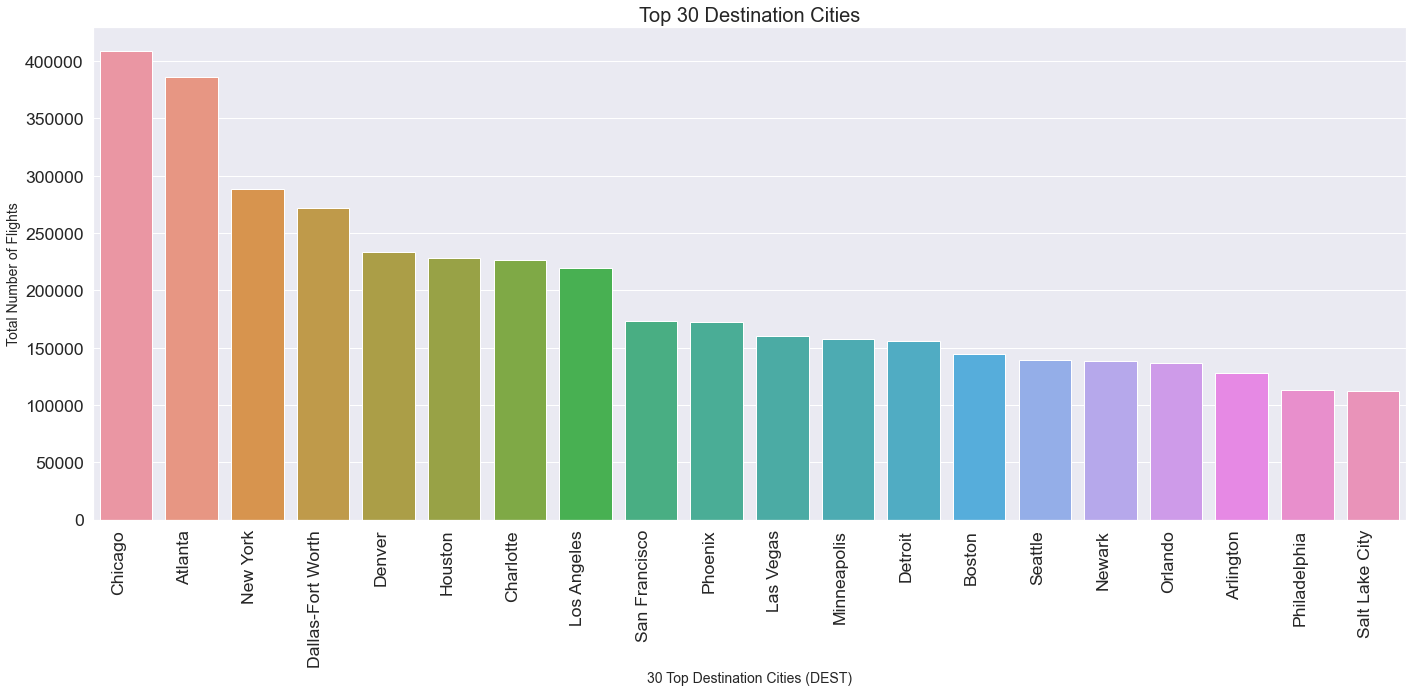

In [16]:
# 20 Most Common Destination (Cities)

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

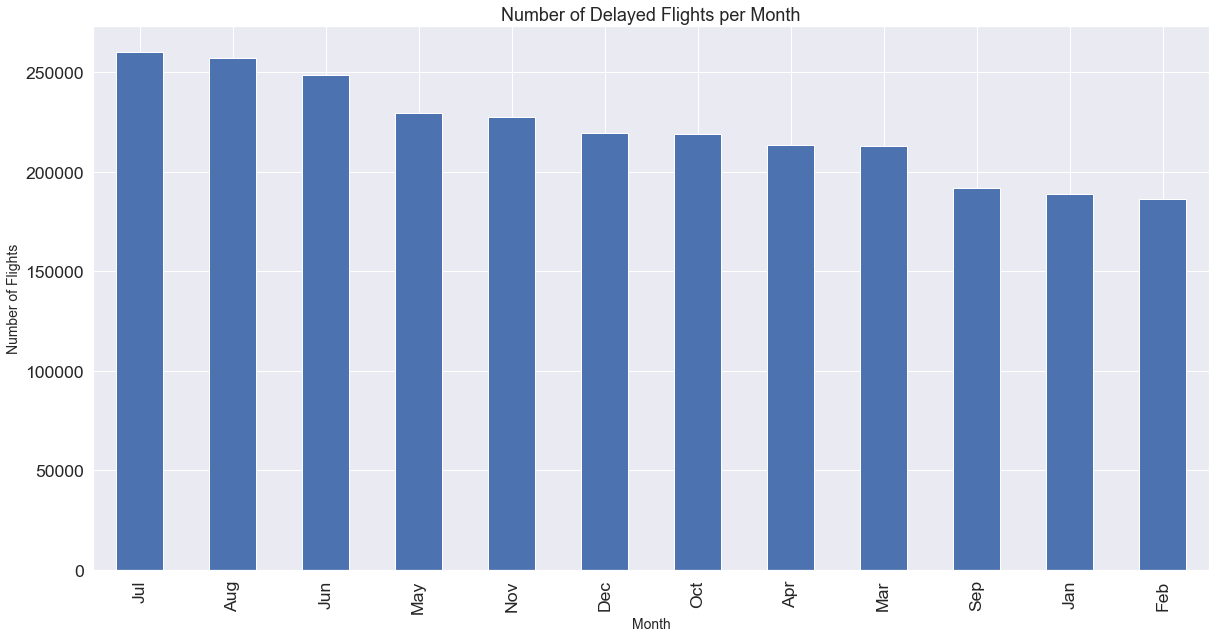

In [17]:
# Worse & Best months to travel based on flight delays

plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

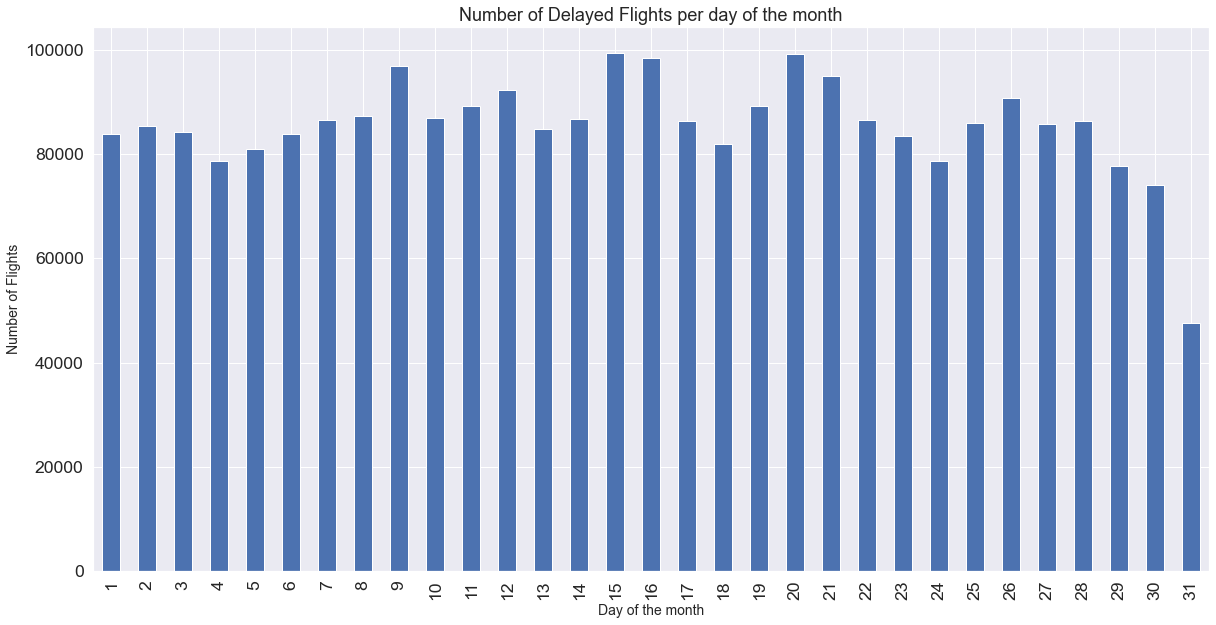

In [18]:
# Is there a better day to travel?

plt.figure(figsize=(20, 10))
df1.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

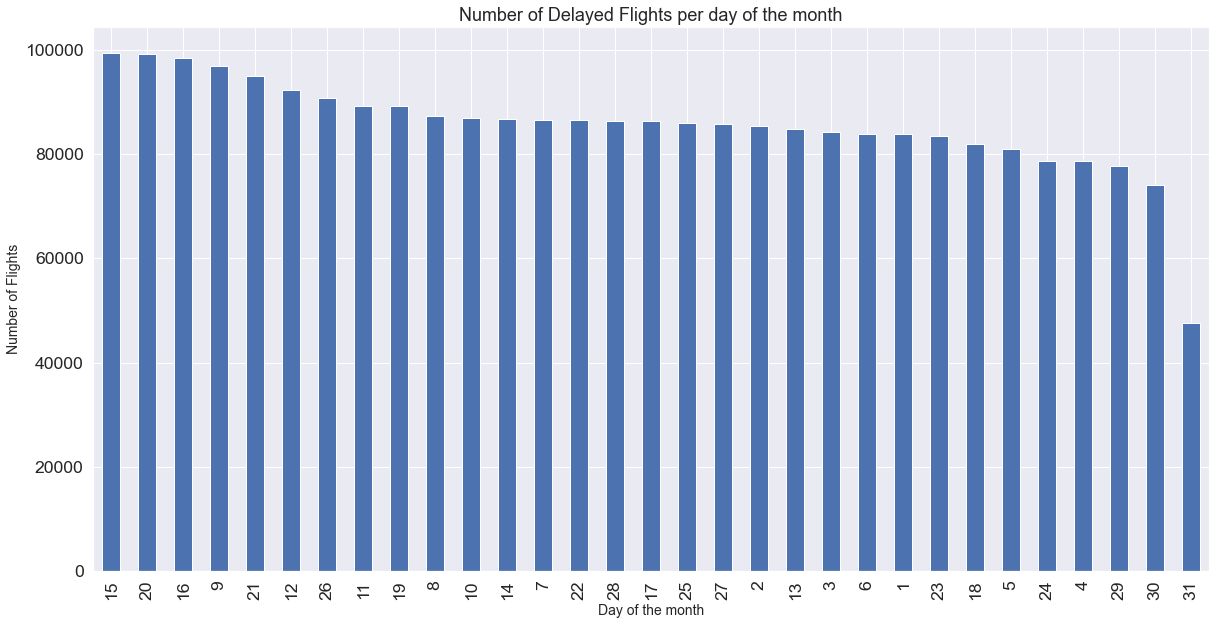

In [19]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

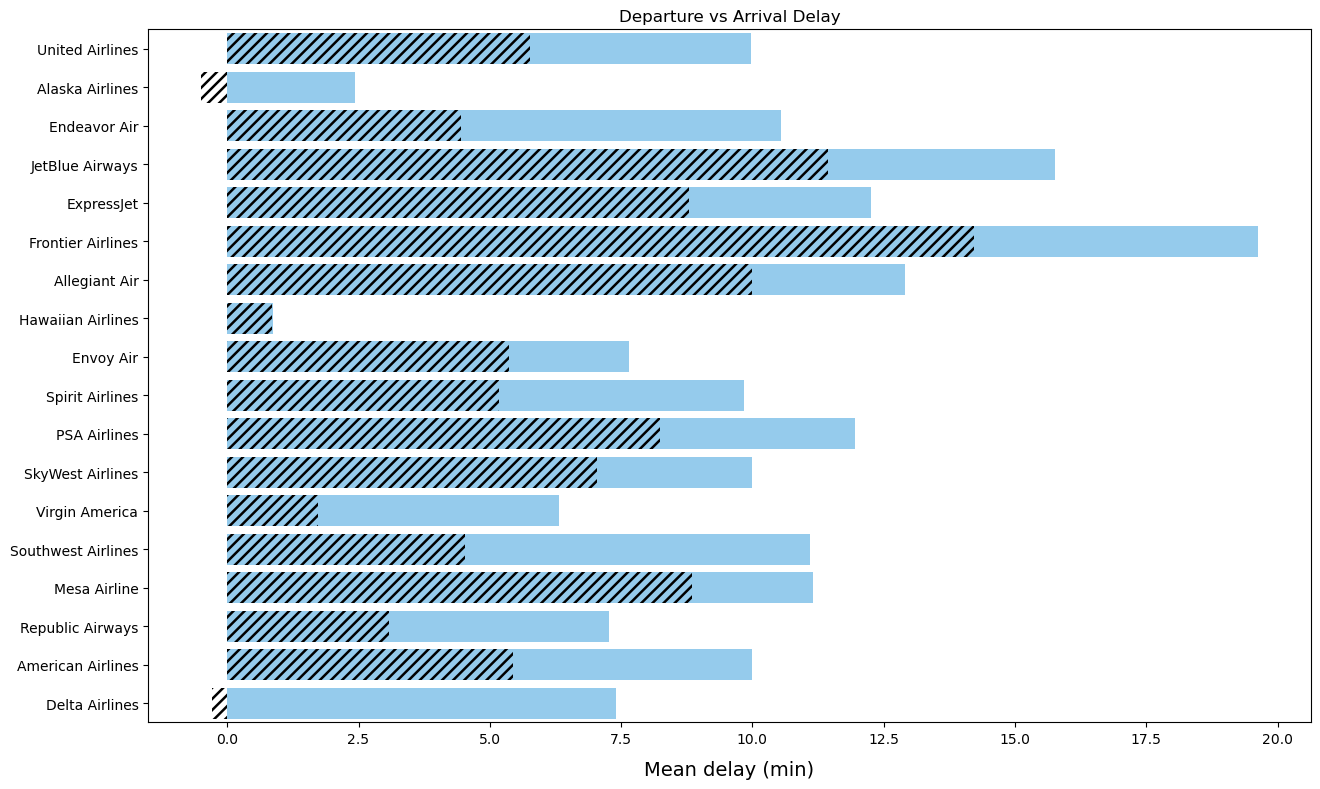

In [20]:
# Impact of Delays (Departure vs. Arrival Delay)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);



In [21]:
df1_LA = df1[(df1['ARR_DELAY'] >= 15)]

In [22]:
df1.shape

(7076405, 20)

In [23]:
df1_LA.shape

(1352710, 20)

In [24]:
df1_LD = df1[(df1['DEP_DELAY'] > 15)]
df1_LD.shape

(1254942, 20)

In [25]:
df1_LD.DEP_DELAY.describe()

count    1.254942e+06
mean     6.800904e+01
std      8.348196e+01
min      1.600000e+01
25%      2.500000e+01
50%      4.200000e+01
75%      8.000000e+01
max      2.710000e+03
Name: DEP_DELAY, dtype: float64

In [26]:
# Most Popular Destination with Average Arrival Delays

In [27]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head(10)

,DEST,ARR_DELAY
0,ART,9.000000
1,AZA,11.075979
2,Aberdeen,3.716621
3,Abilene,5.784016
4,Adak,-6.079208
5,Agana,4.039088
6,Aguadilla,14.286742
7,Akron,13.740124
8,Albany,6.844120
9,Albuquerque,5.599697


In [28]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DEST,FLIGHTS
0,Chicago,409066
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,272147
4,Denver,233411
5,Houston,228072
6,Charlotte,226110
7,Los Angeles,219261
8,San Francisco,173016
9,Phoenix,171959


In [29]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()

,DEST,FLIGHTS,ARR_DELAY
0,Chicago,409066,7.152716
1,Atlanta,386390,2.913906
2,New York,288598,8.483590
3,Dallas-Fort Worth,272147,6.313114
4,Denver,233411,3.132397


In [30]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,30.000000,30.000000
mean,159759.466667,4.876287
std,89709.856187,3.178137
min,65186.000000,0.665390
25%,91315.750000,2.943665
50%,138795.500000,4.297933
75%,207699.750000,6.272611
max,409066.000000,16.652241


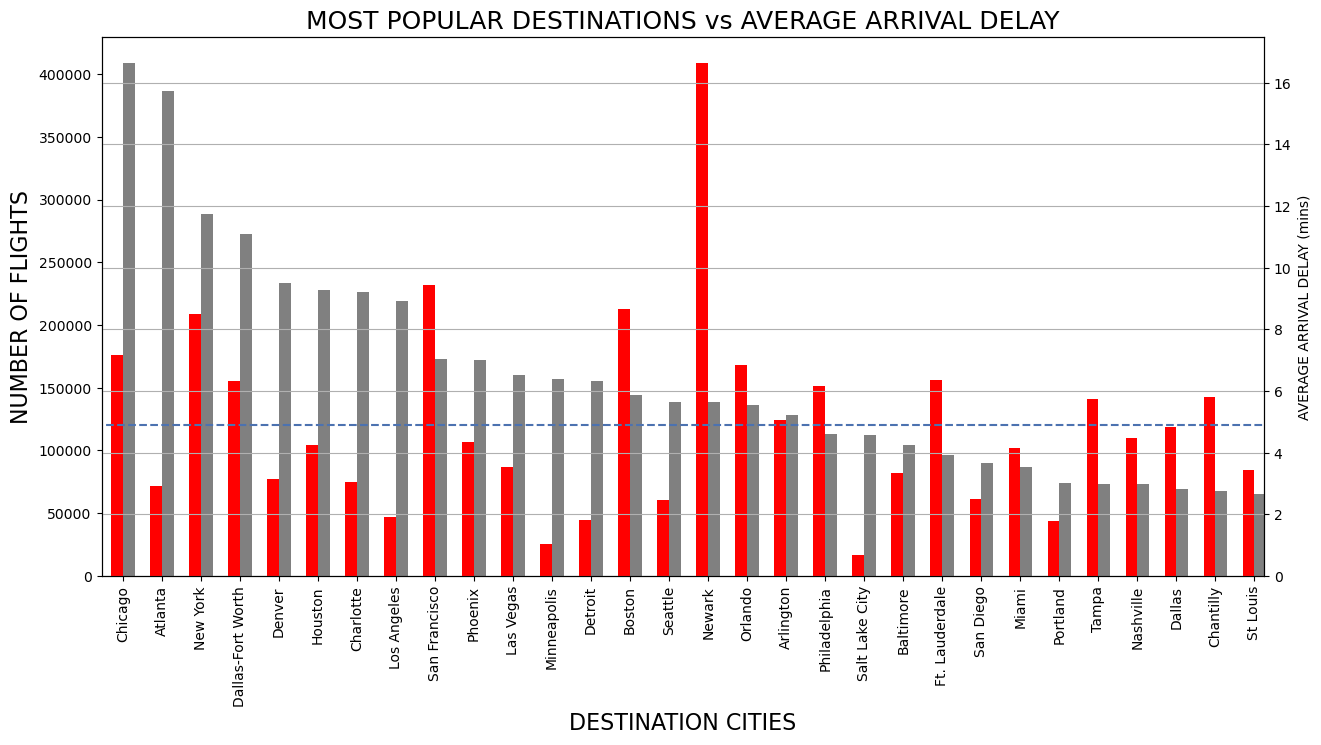

In [31]:
test_4_5 = test_4_5.set_index('DEST')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARR_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

In [32]:
# Departure Cities with the most Delayed Departure Flights

In [33]:
test_6 = df1[['ORIGIN', 'DEP_DELAY']]
test_6 = test_6.groupby(['ORIGIN']).mean().reset_index()
test_6.head(10)

,ORIGIN,DEP_DELAY
0,ART,36.333333
1,AZA,8.617738
2,Aberdeen,7.667120
3,Abilene,8.033333
4,Adak,3.851485
5,Agana,5.944715
6,Aguadilla,15.551189
7,Akron,13.759247
8,Albany,8.566033
9,Albuquerque,8.623021


In [34]:
test_7 = df1.ORIGIN.value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN,FLIGHTS
0,Chicago,409776
1,Atlanta,386179
2,New York,289169
3,Dallas-Fort Worth,273214
4,Denver,233741
5,Houston,228365
6,Charlotte,226773
7,Los Angeles,218992
8,San Francisco,172958
9,Phoenix,172275


In [35]:
test_6_7 = pd.merge(test_7, test_6, on='ORIGIN')
test_6_7.head()

,ORIGIN,FLIGHTS,DEP_DELAY
0,Chicago,409776,12.778506
1,Atlanta,386179,9.543339
2,New York,289169,12.038248
3,Dallas-Fort Worth,273214,12.024142
4,Denver,233741,10.301500


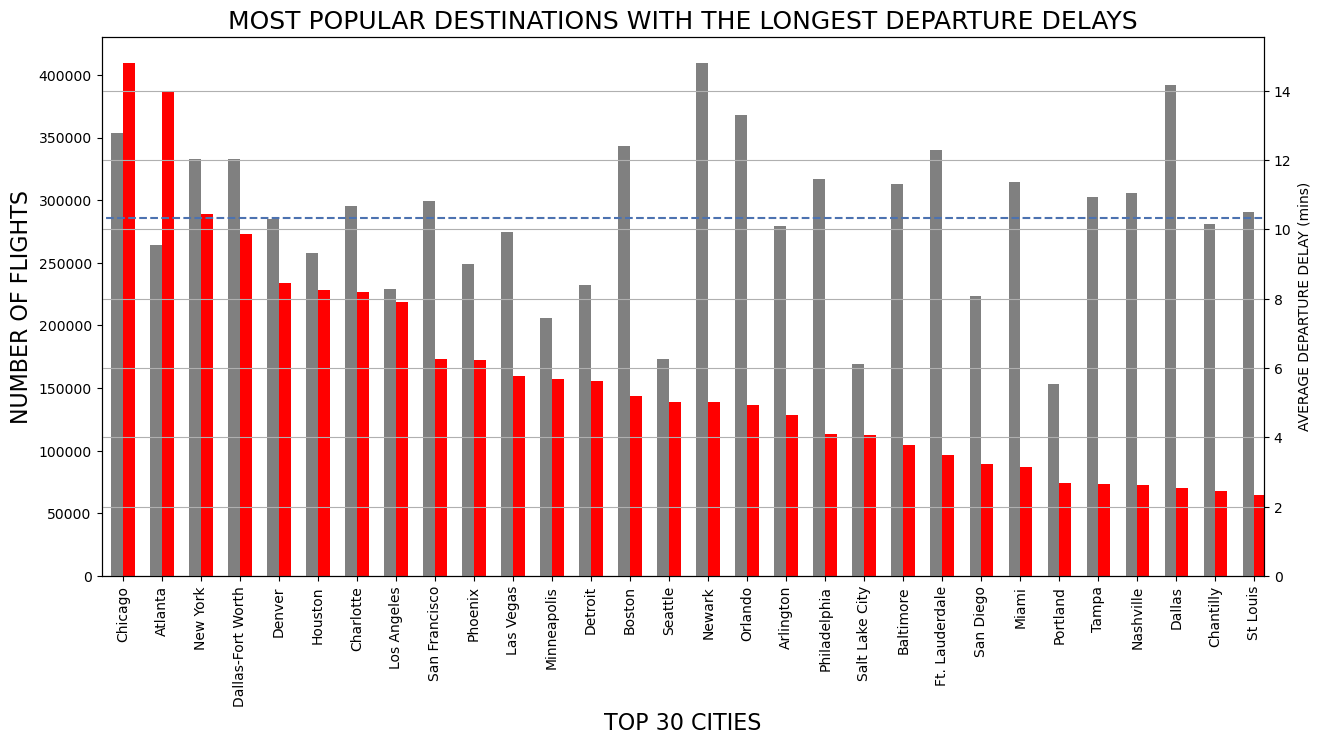

In [36]:
test_6_7 = test_6_7.set_index('ORIGIN')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEP_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()


In [40]:
# Number of Destinations by Airline

cities = df1[['OP_CARRIER', 'DEST', 'ARR_DELAY']]
cities = cities.groupby(['OP_CARRIER', 'DEST']).mean().reset_index()

In [41]:
cities.OP_CARRIER.value_counts()

SkyWest Airlines      252
Envoy Air             153
Delta Airlines        148
ExpressJet            141
Endeavor Air          130
Allegiant Air         125
Mesa Airline          119
United Airlines       115
American Airlines     108
Republic Airways      105
PSA Airlines          100
Frontier Airlines      95
Southwest Airlines     85
Alaska Airlines        75
JetBlue Airways        70
Spirit Airlines        44
Virgin America         27
Hawaiian Airlines      18
Name: OP_CARRIER, dtype: int64

In [42]:
temp = cities[(cities['OP_CARRIER'] == "Delta Airlines")]

temp.head()

,OP_CARRIER,DEST,ARR_DELAY
308,Delta Airlines,Akron,-0.635277
309,Delta Airlines,Albany,-3.156137
310,Delta Airlines,Albuquerque,-3.719858
311,Delta Airlines,Allentown,-3.693593
312,Delta Airlines,Anchorage,-1.581935


In [43]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 148.
temp.DEST.nunique()

148

In [44]:
cities_airline = cities.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,OP_CARRIER,NUMBER_CITIES
0,SkyWest Airlines,252
1,Envoy Air,153
2,Delta Airlines,148
3,ExpressJet,141
4,Endeavor Air,130
5,Allegiant Air,125
6,Mesa Airline,119
7,United Airlines,115
8,American Airlines,108
9,Republic Airways,105


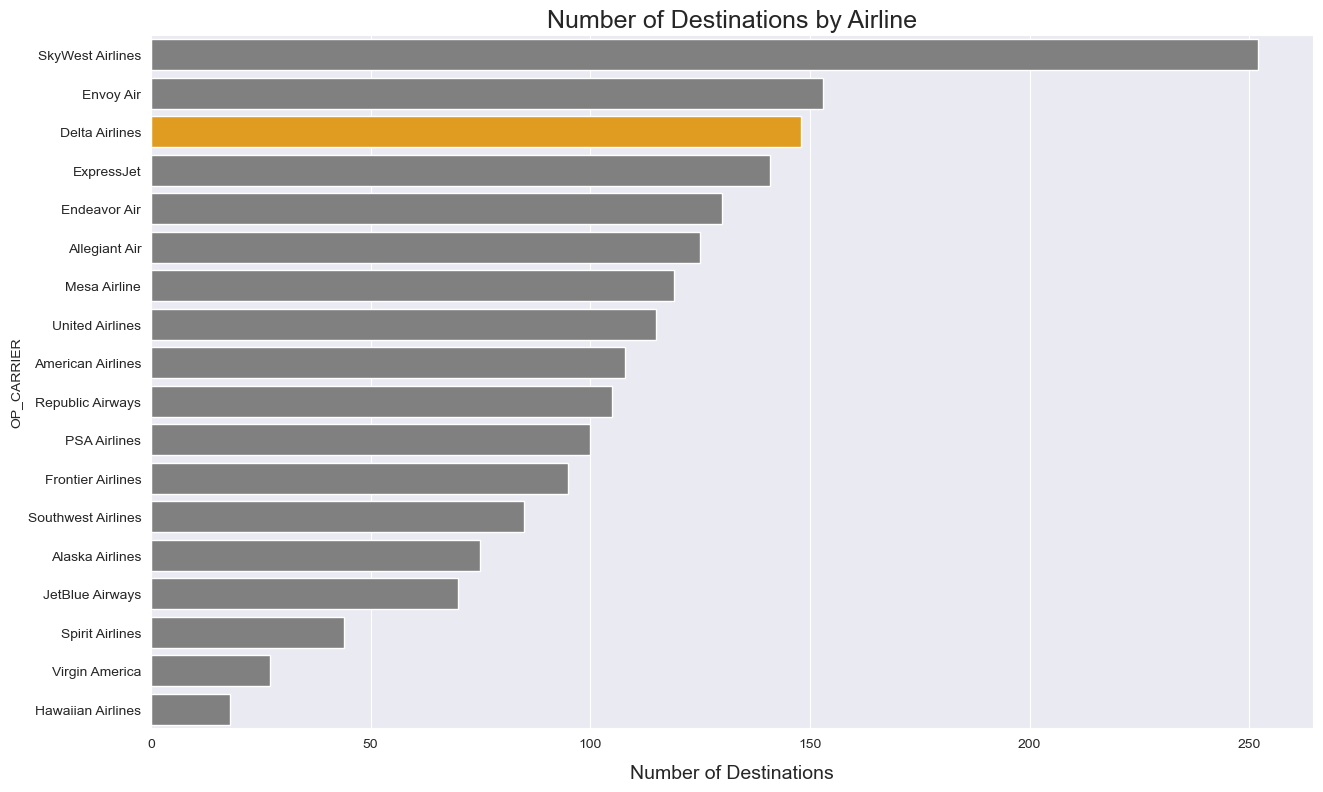

In [45]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [46]:
df1.columns

Index(['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS'],
      dtype='object')

In [47]:
df1['ARR-DEP_DELAY'] = df1['ARR_DELAY'] - df1['DEP_DELAY']
df1.head(3).append(df1.tail(3))

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,ARR-DEP_DELAY
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0,-18.0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0,-16.0
2,2018-01-01,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0,-8.0
7213443,2018-12-31,31,12,Dec,American Airlines,Charlotte,Memphis,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,1,16.0
7213444,2018-12-31,31,12,Dec,American Airlines,Charlotte,Raleigh,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,1,-9.0
7213445,2018-12-31,31,12,Dec,American Airlines,Raleigh,Charlotte,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,0,-12.0


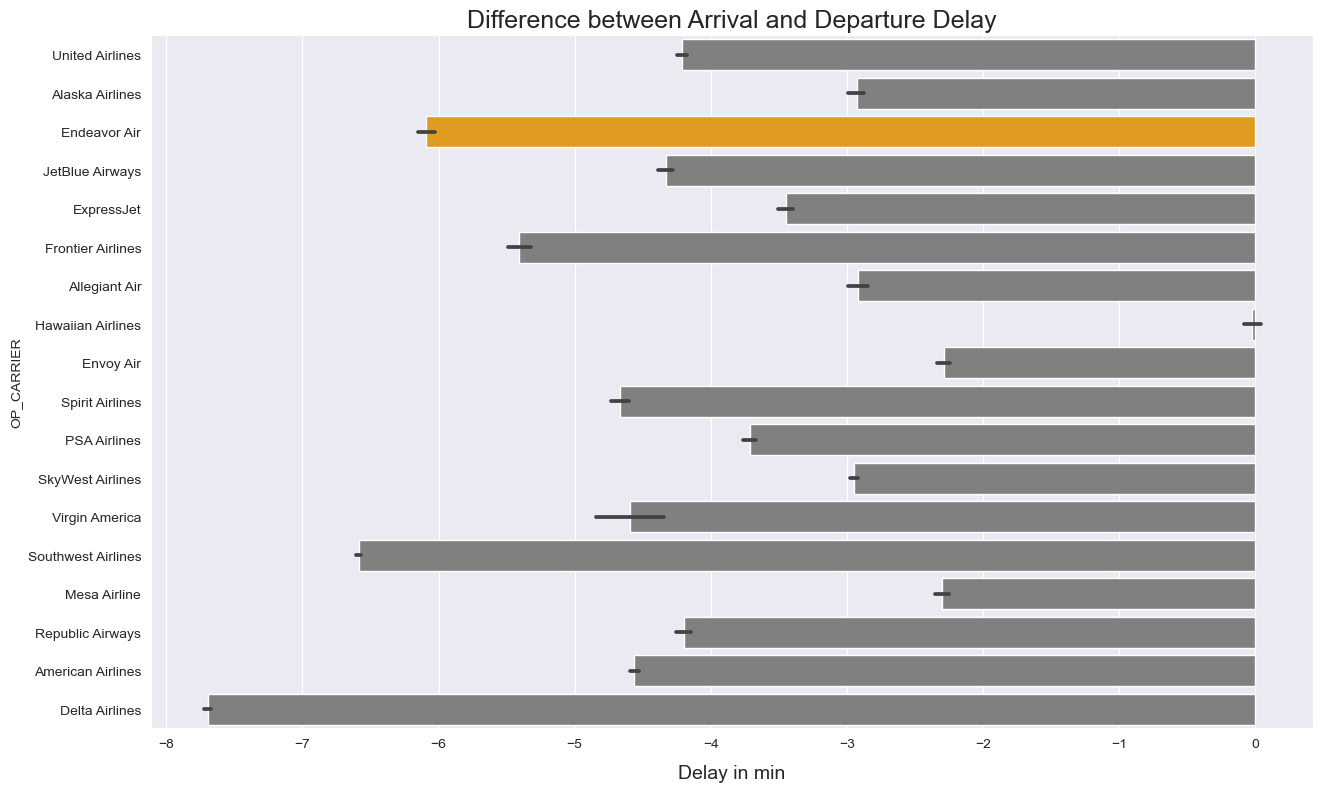

In [48]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="OP_CARRIER", data=df1, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay in min', fontsize=14, labelpad=10);
plt.show()

# Visualizations - Sub-Plots

In [52]:
df2 = pd.merge(df_fp, test_3, on='OP_CARRIER')
df2 = pd.merge(df2, cities_airline, on='OP_CARRIER')
df2.head(3)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES
0,Alaska Airlines,89483,242979,36.83,-0.501562,75
1,Allegiant Air,39754,95192,41.76,9.983518,125
2,American Airlines,355079,899527,39.47,5.432065,108


In [53]:
test_8 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_8.head(2)

,OP_CARRIER,ARR_DELAY
0,United Airlines,-23.0
1,United Airlines,-24.0


In [54]:
test_8.shape

(7076405, 2)

In [55]:
test_8 = test_8.groupby('OP_CARRIER').sum().sort_values(by=['ARR_DELAY']).reset_index()
test_8.rename({'ARR_DELAY': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)

In [56]:

df2 = pd.merge(df2, test_8, on='OP_CARRIER')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
14,Southwest Airlines,543141,1331609,40.79,4.519644,85,6018399.0
3,Delta Airlines,278386,943837,29.50,-0.289825,148,-273548.0
2,American Airlines,355079,899527,39.47,5.432065,108,4886289.0
13,SkyWest Airlines,280846,760796,36.91,7.044141,252,5359154.0
16,United Airlines,225978,614915,36.75,5.764875,115,3544908.0
12,Republic Airways,105360,305251,34.52,3.076668,105,939156.0
9,JetBlue Airways,131673,297758,44.22,11.432516,70,3404123.0
5,Envoy Air,111435,284497,39.17,5.357280,153,1524130.0
11,PSA Airlines,113097,265784,42.55,8.237351,100,2189356.0
0,Alaska Airlines,89483,242979,36.83,-0.501562,75,-121869.0


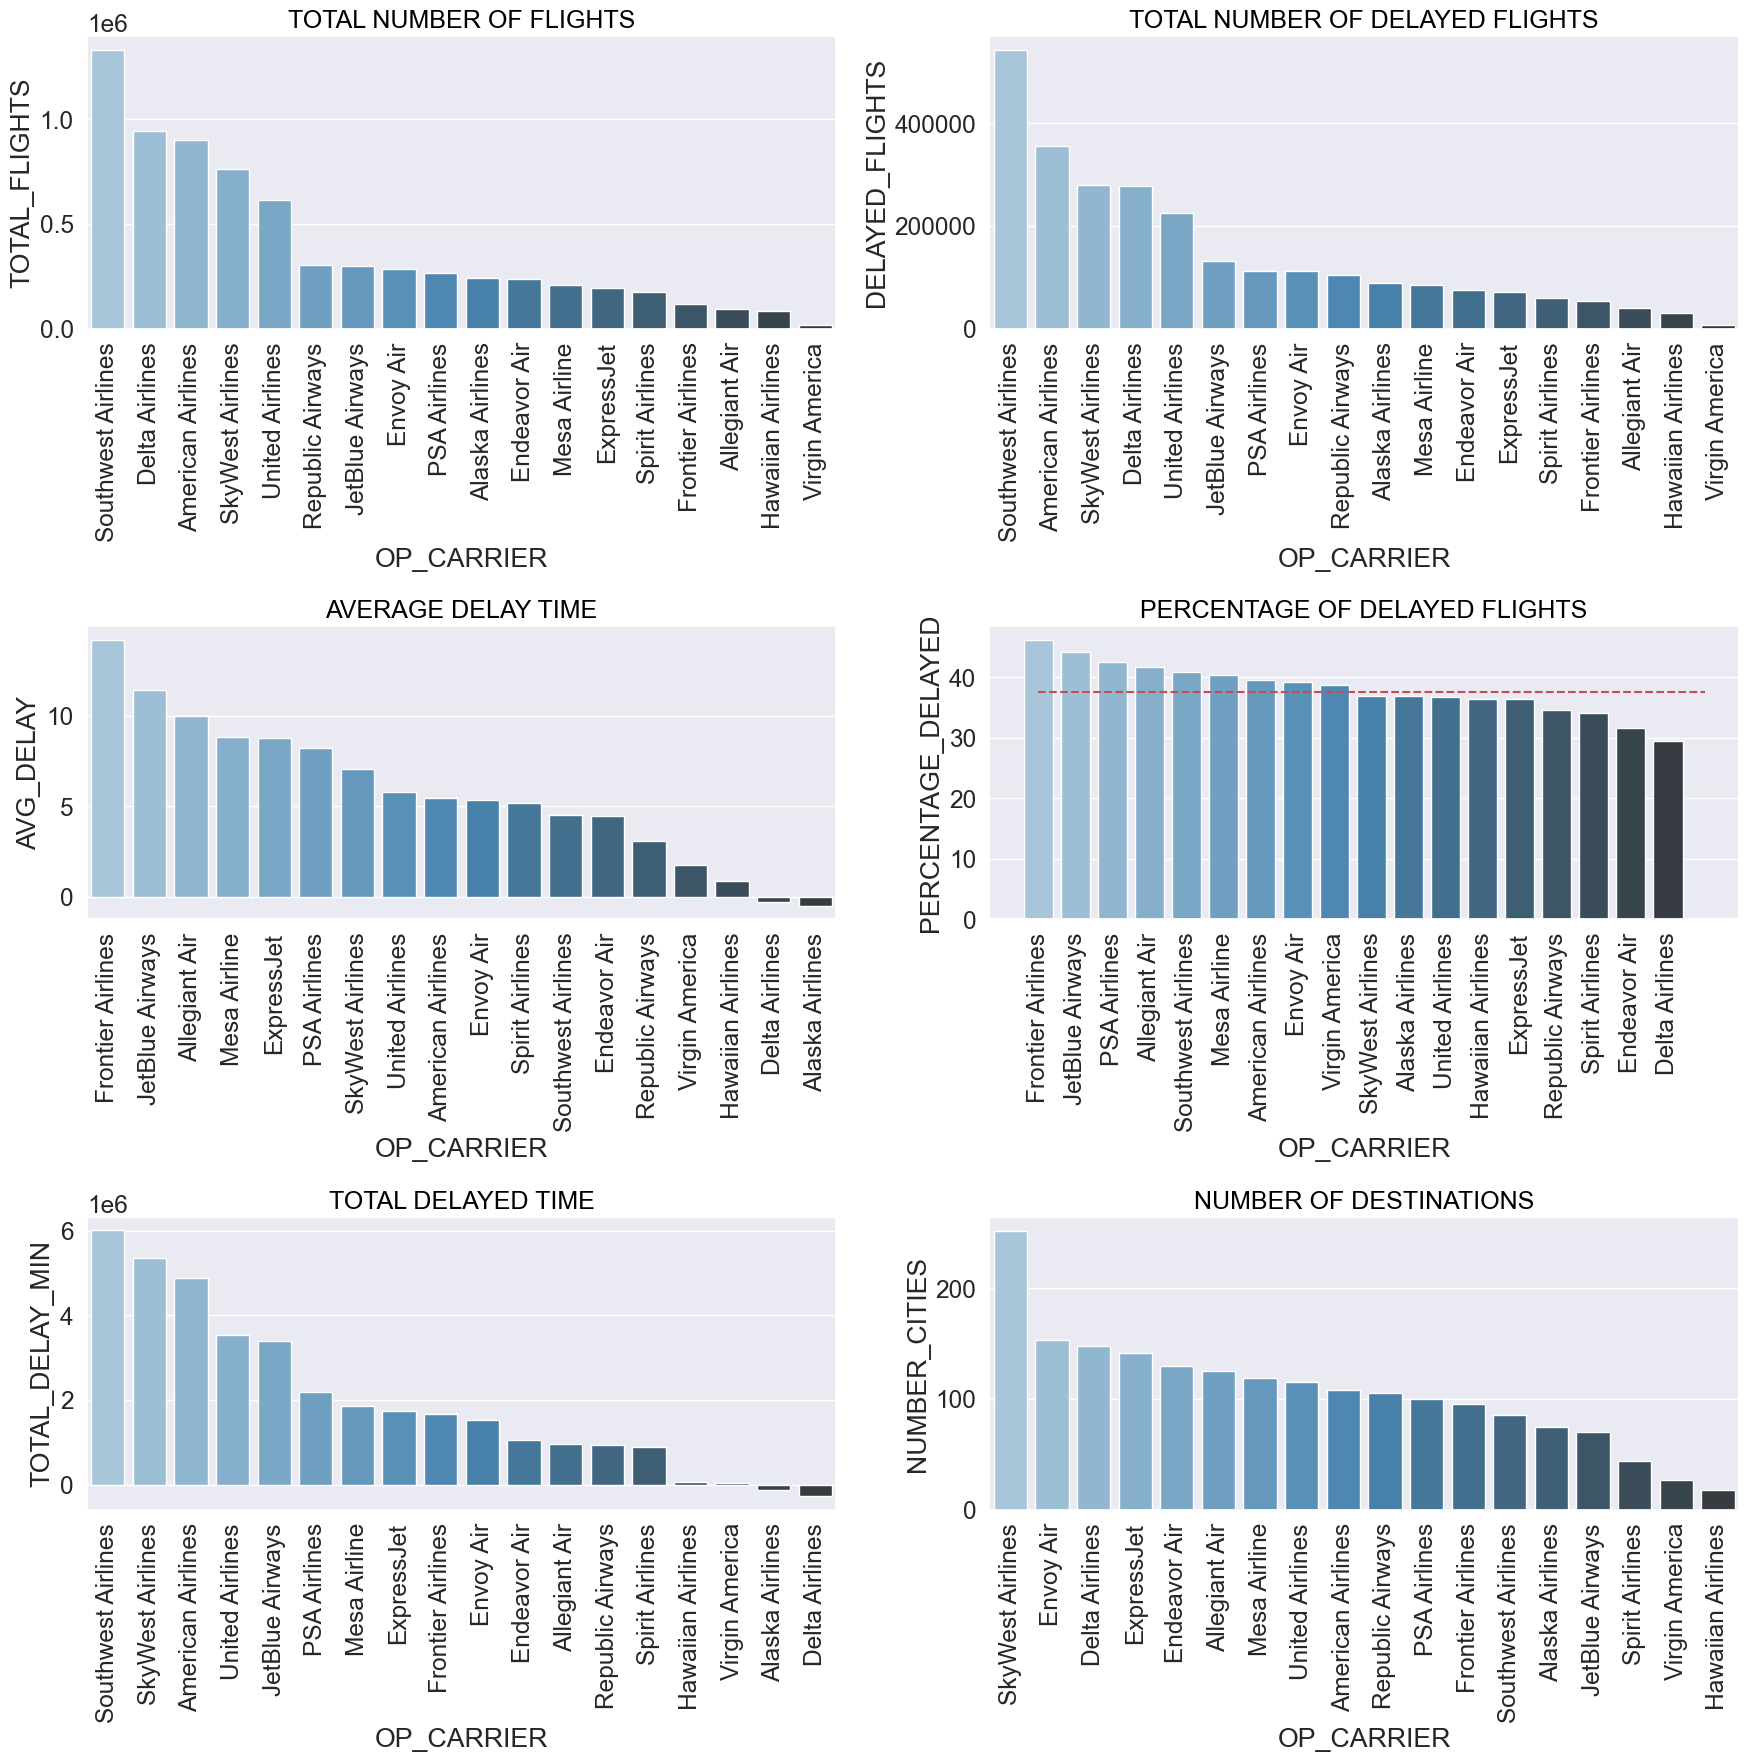

In [57]:
#highlight = "Delta Airlines"
#pos = df1.OP_CARRIER.get_loc(highlight)

fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('TOTAL NUMBER OF FLIGHTS', fontsize=18, color="black")
sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('TOTAL NUMBER OF DELAYED FLIGHTS', fontsize=18, color="black")
sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub2)
#sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('AVERAGE DELAY TIME', fontsize=18, color="black")
sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('PERCENTAGE OF DELAYED FLIGHTS', fontsize=18, color="black")
sub4 = sns.barplot(x="OP_CARRIER", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TOTAL DELAYED TIME', fontsize=18, color="black")
sub5 = sns.barplot(x="OP_CARRIER", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)
sub6 = fig.add_subplot(326)
sub6.set_title('NUMBER OF DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="OP_CARRIER", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()